In [1]:
import pickle
import copy

f = open("/Users/rachelralph/Desktop/bcjobs-data", "rb")
data_struct = pickle.load(f)
unmodified_jobs = copy.deepcopy(data_struct)

In [3]:
#Process jobs for labeling:
#We will use the first fifty jobs in the bc jobs dataset because they are the most likely to be tech related. 

from nltk import sent_tokenize

job_sentences = []
for job in unmodified_jobs[:50]:
    descrip = job["descrip"]
    descrip = descrip.split("•") 
    for line in descrip:
        line = sent_tokenize(line)
        job_sentences = job_sentences + line


#Check it twas done properly.
len(job_sentences)

1720

In [4]:
#Shuffle job sentences.
from sklearn.utils import shuffle

job_sentences = shuffle(job_sentences, random_state=42)

Code needed to write sentences to a file -- this is only done if you want to relabel those sentences or label some more. Currently, 350 sentences are labeled.

In [5]:
#Categories to label. 
#Salary --> S
#Technical Skill --> TS
#Soft Skill --> SS
#Corporate Jargon --> CJ
#Experience --> E
#Degree --> D

#f = open("labeled_sentneces.txt", "w")

#for sentence in job_sentences[:200]:
#    f.write(sentence + " : " + "\n")


#f.close()

Read labeled sentences

In [8]:
f = open("/Users/rachelralph/Desktop/Job Description Shennanigans/labeled_sentneces2.txt", "r")

text = str(f.read())
print(type(text))
f.close()

sentences = text.split("\n")

labeled_sentences = []

for sentence in sentences:
    labeled_sentence = sentence.split(":")
    if(len(labeled_sentence) == 2):
        labeled_sentences.append(labeled_sentence)

len(labeled_sentences)

<class 'str'>


178

In [10]:
f = open("/Users/rachelralph/Desktop/Job Description Shennanigans/labeled_sentneces4.txt", "r")


text = str(f.read())
print(type(text))
f.close()


sentences = text.split("\n")

for sentence in sentences:
    labeled_sentence = sentence.split(":")
    if(len(labeled_sentence) == 2):
        labeled_sentences.append(labeled_sentence)

len(labeled_sentences)


f.close()

len(labeled_sentences)

<class 'str'>


354

In [13]:
#Provide counts of how many sentences were labelled for each category.


def count_types(labeled_sentences):
    CJ = 0
    E = 0
    TS = 0
    SS = 0
    D = 0
    S = 0
    other = 0
    
    other_sent = []
    
    for i in range(len(labeled_sentences)):
        labeled_sentences[i][1] = labeled_sentences[i][1].strip()
        label = labeled_sentences[i][1]
    
        if label == "CJ":
            CJ += 1
        elif label == "E":
            E += 1
        elif label == "TS":
            TS += 1
        elif label == "SS":
            SS += 1
        elif label == "D":
            D += 1
        elif label == "S":
            S += 1
        else:
            other += 1
            other_sent.append(i)
    
    print("CJ: ", CJ, "\n E: ", E)
    print("TS: ", TS, "\nSS: ", SS)
    print(" D: ", D, "\n S: ", S)
    print("OTHER: ", other)

    return other_sent

other_sent = count_types(labeled_sentences)

['Minimum 6-12 years of related consulting experience working in an engineering role. ', 'E']
['as determined through the selection process. ', 'CJ']
['With a proven track record for almost\xa0a decade, we specialize in crafting digital solutions that elevate businesses to new heights. ', 'CJ']
['Casuals have the option of paying for benefits. ', 'S']
['The new developer will be primarily working on the FortiClient EMS software with an emphasis on both front-end and back-end web development. ', 'TS']
['Manages budget for capability; managing salary, contract and development resources. ', 'SS']
['We are committed to creating a diverse and inclusive environment for all employees. ', 'CJ']
["WSP  is one of the world's leading professional services firms. ", 'CJ']
['The ability to solve complex client issues is critical to our consulting business. ', 'CJ']
['Experience with agile software development methodologies (Scrum, Kanban, etc.) ', 'TS']
['This includes, but is not limited to, peopl

In [14]:
#Remove sentences that were mislabeled from the dataset

adj = 0
for index in other_sent:
    labeled_sentences.pop(index - adj)
    adj += 1

In [15]:
#Check that worked

count_types(labeled_sentences)

['Minimum 6-12 years of related consulting experience working in an engineering role. ', 'E']
['as determined through the selection process. ', 'CJ']
['With a proven track record for almost\xa0a decade, we specialize in crafting digital solutions that elevate businesses to new heights. ', 'CJ']
['Casuals have the option of paying for benefits. ', 'S']
['The new developer will be primarily working on the FortiClient EMS software with an emphasis on both front-end and back-end web development. ', 'TS']
['Manages budget for capability; managing salary, contract and development resources. ', 'SS']
['We are committed to creating a diverse and inclusive environment for all employees. ', 'CJ']
["WSP  is one of the world's leading professional services firms. ", 'CJ']
['The ability to solve complex client issues is critical to our consulting business. ', 'CJ']
['Experience with agile software development methodologies (Scrum, Kanban, etc.) ', 'TS']
['We have over 65,000 team members across the

[]

In [16]:
#Divide into labels and values. :)

X = []
y = []
for sentence in labeled_sentences:
    X.append(sentence[0])
    y.append(sentence[1])

In [18]:
import nltk
import ssl
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize

nltk.download('stopwords')
stop_words = set(stopwords.words("english"))

punct = [";", ".", ",", "!" "(", ")", ":"]

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context


def job_descrip_preprocessing(sentences):

    for i in range(len(sentences)):
        print(i)
        sentence = sentences[i]
        print(sentence)
        sentence = sentence.lower()

        #remove punctuation
        sentence = "".join([w for w in sentence if w not in punct])
    
        #word tolkenize
        sentence = word_tokenize(sentence)
        
        #stem
        stemmer = PorterStemmer()
        sentence = [stemmer.stem(w) + " " for w in sentence if not w in stop_words]

        #Join for the randomforesting.
        sentences[i] = "".join(sentence)
    
    
    return sentences

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rachelralph/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
X = job_descrip_preprocessing(X)
X

0
Minimum 6-12 years of related consulting experience working in an engineering role. 
minimum 6-12 year relat consult experi work engin role 
1
as determined through the selection process. 
determin select process 
2
With a proven track record for almost a decade, we specialize in crafting digital solutions that elevate businesses to new heights. 
proven track record almost decad special craft digit solut elev busi new height 
3
Casuals have the option of paying for benefits. 
casual option pay benefit 
4
The new developer will be primarily working on the FortiClient EMS software with an emphasis on both front-end and back-end web development. 
new develop primarili work forticli em softwar emphasi front-end back-end web develop 
5
Manages budget for capability; managing salary, contract and development resources. 
manag budget capabl manag salari contract develop resourc 
6
We are committed to creating a diverse and inclusive environment for all employees. 
commit creat divers inclus

['minimum 6-12 year relat consult experi work engin role ',
 'determin select process ',
 'proven track record almost decad special craft digit solut elev busi new height ',
 'casual option pay benefit ',
 'new develop primarili work forticli em softwar emphasi front-end back-end web develop ',
 'manag budget capabl manag salari contract develop resourc ',
 'commit creat divers inclus environ employe ',
 "wsp one world 's lead profession servic firm ",
 'abil solv complex client issu critic consult busi ',
 'experi agil softwar develop methodolog ( scrum kanban etc ',
 '65000 team member across globe ',
 'collabor talent divers profession lead manag deliveri open pit underground mine geotechn servic projectsour mine team help client optimis perform boost profit oper respons ',
 'learn deep subject matter expert mentor job coach build leadership skill deloitt univers ',
 'tvp relationship - leader peopl firm peopl peer within communitiesth next step deloitt busi inclus - start divers co

In [20]:
#Encode X as a BOW format.
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)
X = X.toarray()
X

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [21]:
#Encode y as numbers

for i in range(len(y)):

    if y[i] == "CJ":
        y[i] = 0
    elif y[i] == "E":
        y[i] = 1
    elif y[i] == "TS":
        y[i] = 2
    elif y[i] == "SS":
        y[i] = 3
    elif y[i] == "D":
        y[i] = 4
    elif y[i] == "S":
       y[i] = 5
    else:
        print("PANNNICCC!")

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6893203883495146

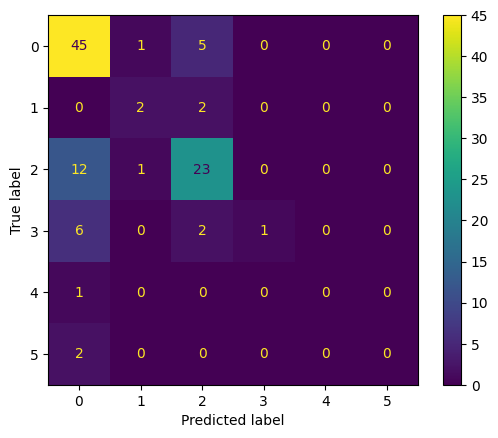

In [25]:
from sklearn.metrics import confusion_matrix

y_result = clf.predict(X_test)

cm = confusion_matrix(y_test, y_result, labels=clf.classes_)

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()